In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Algerian_forest_fires.csv",header=1)

In [3]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [4]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [5]:
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [6]:
df.drop([122,123],inplace=True)

In [7]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [8]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [11]:
df["input_date"] = (df["year"]+ "-" + df["month"] + "-" + df["day"])

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,input_date
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,2012-06-01
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0,2012-06-02
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,2012-06-03
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0,2012-06-04
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0,2012-09-26
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0,2012-09-27
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0,2012-09-28
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0,2012-09-29


In [13]:
df['input_date'] = pd.to_datetime(df['input_date'])

In [14]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,input_date
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,2012-06-01
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0,2012-06-02
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,2012-06-03
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0,2012-06-04
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0,2012-09-26
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0,2012-09-27
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0,2012-09-28
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0,2012-09-29


In [15]:
df['dayOfWeek'] = df['input_date'].dt.day_name()

In [16]:
df["month_name"] = df["input_date"].dt.month_name()

In [17]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,input_date,dayOfWeek,month_name
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,2012-06-01,Friday,June
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0,2012-06-02,Saturday,June
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,2012-06-03,Sunday,June
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0,2012-06-04,Monday,June
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0,2012-06-05,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0,2012-09-26,Wednesday,September
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0,2012-09-27,Thursday,September
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0,2012-09-28,Friday,September
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0,2012-09-29,Saturday,September


In [18]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
input_date     0
dayOfWeek      0
month_name     0
dtype: int64

In [19]:
df.columns = df.columns.str.strip()

In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'input_date',
       'dayOfWeek', 'month_name'],
      dtype='object')

In [21]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,input_date,dayOfWeek,month_name
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,2012-06-01,Friday,June
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0,2012-06-02,Saturday,June
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,2012-06-03,Sunday,June
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0,2012-06-04,Monday,June
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0,2012-06-05,Tuesday,June


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    object        
 1   month        244 non-null    object        
 2   year         244 non-null    object        
 3   Temperature  244 non-null    object        
 4   RH           244 non-null    object        
 5   Ws           244 non-null    object        
 6   Rain         244 non-null    object        
 7   FFMC         244 non-null    object        
 8   DMC          244 non-null    object        
 9   DC           244 non-null    object        
 10  ISI          244 non-null    object        
 11  BUI          244 non-null    object        
 12  FWI          244 non-null    object        
 13  Classes      243 non-null    object        
 14  Region       244 non-null    float64       
 15  input_date   244 non-null    datetime64[ns]
 16  dayOfWee

In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'input_date',
       'dayOfWeek', 'month_name'],
      dtype='object')

In [24]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', "Region"]] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', "Region"]].astype("int")

In [25]:
df.dropna(inplace=True)

In [26]:
objects = ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
for i in objects:
    print(i)
    if i!= "Classes":
         df[i] = df[i].astype(float)

Rain
FFMC
DMC
DC
ISI
BUI
FWI
Classes


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          243 non-null    int32         
 1   month        243 non-null    int32         
 2   year         243 non-null    int32         
 3   Temperature  243 non-null    int32         
 4   RH           243 non-null    int32         
 5   Ws           243 non-null    int32         
 6   Rain         243 non-null    float64       
 7   FFMC         243 non-null    float64       
 8   DMC          243 non-null    float64       
 9   DC           243 non-null    float64       
 10  ISI          243 non-null    float64       
 11  BUI          243 non-null    float64       
 12  FWI          243 non-null    float64       
 13  Classes      243 non-null    object        
 14  Region       243 non-null    int32         
 15  input_date   243 non-null    datetime64[ns]
 16  dayOfWee

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,input_date,dayOfWeek,month_name
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,2012-06-01,Friday,June
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,2012-06-02,Saturday,June
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,2012-06-03,Sunday,June
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,2012-06-04,Monday,June
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,2012-06-05,Tuesday,June


In [29]:
df.shape

(243, 18)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [31]:
df["Classes"] =  df["Classes"].str.strip()

In [32]:
df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [33]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,input_date,dayOfWeek,month_name
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,2012-06-01,Friday,June
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,2012-06-02,Saturday,June
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,2012-06-03,Sunday,June
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,2012-06-04,Monday,June
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,2012-06-05,Tuesday,June


In [34]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,input_date,dayOfWeek,month_name
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,2012-06-01,Friday,June
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,2012-06-02,Saturday,June
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,2012-06-03,Sunday,June
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,2012-06-04,Monday,June
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,2012-06-05,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,0,2012-09-26,Wednesday,September
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,0,2012-09-27,Thursday,September
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0,2012-09-28,Friday,September
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0,2012-09-29,Saturday,September


In [35]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,input_date,dayOfWeek,month_name
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1,2012-06-01,Friday,June
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1,2012-06-02,Saturday,June
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1,2012-06-03,Sunday,June
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1,2012-06-04,Monday,June
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1,2012-06-05,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,2012-09-26,Wednesday,September
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,2012-09-27,Thursday,September
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,2012-09-28,Friday,September
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,2012-09-29,Saturday,September


In [36]:
df.to_csv("algerian_forest_dataset_cleaned.csv", index=False)

In [37]:
# EDA

In [38]:
df1 = df.drop(["month", "day", "year"], axis=1)

In [41]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,input_date,dayOfWeek,month_name
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,2012-06-01,Friday,June
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,2012-06-02,Saturday,June
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,2012-06-03,Sunday,June
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,2012-06-04,Monday,June
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,2012-06-05,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,2012-09-26,Wednesday,September
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,2012-09-27,Thursday,September
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,2012-09-28,Friday,September
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,2012-09-29,Saturday,September


In [42]:
import numpy as np
df1["Classes"] = np.where(df1["Classes"] == "not fire", 0, 1)

In [40]:
#encoding fire and not fire as 1 and 0

In [47]:
df1["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

C:\Users\Sunny\AppData\Local\Temp\ipykernel_18292\1756729801.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


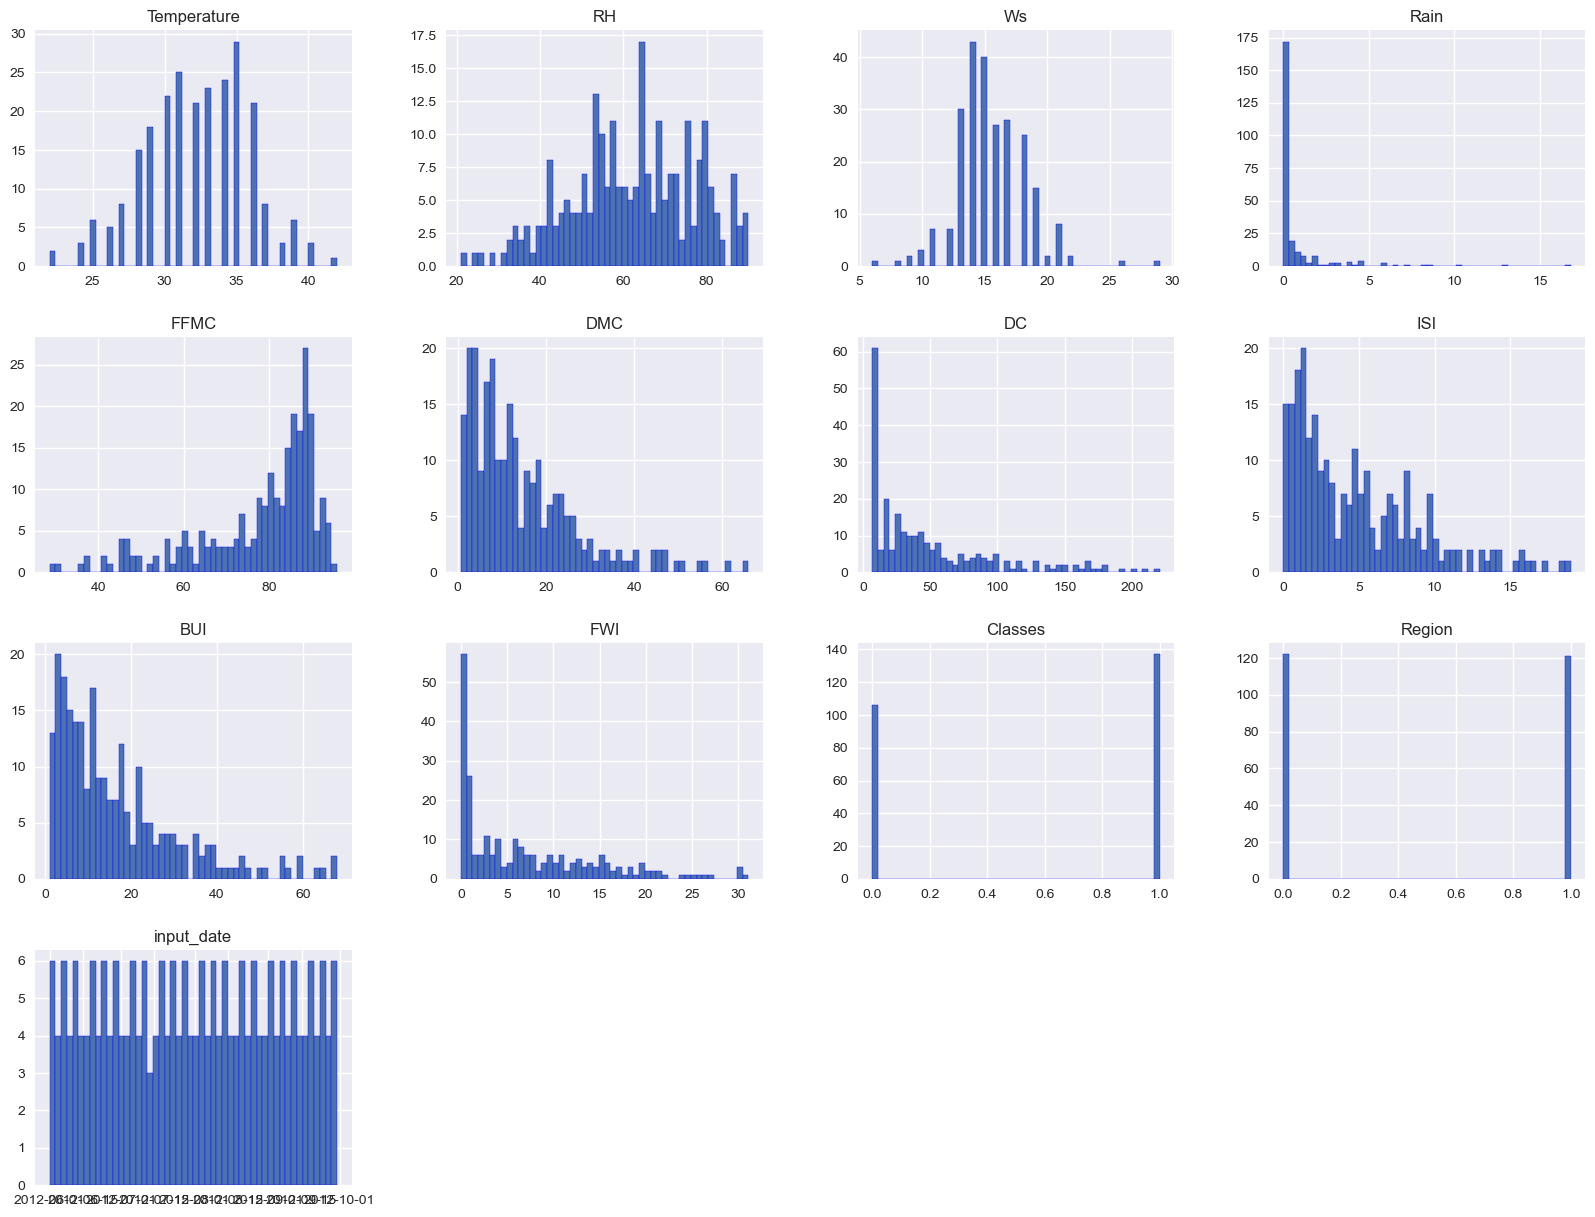

In [49]:
#plot density plot for all features

plt.style.use("seaborn")
df1.hist(bins=50, figsize=(20,15), ec= "b")
plt.show()

In [56]:
# percentage for pie chart
percentage = df1.Classes.value_counts(normalize=True)*100

In [57]:
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [58]:
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

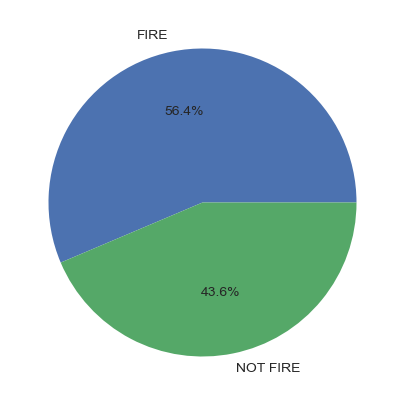

In [63]:
#plotting pie chart
classlabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize=(10,5))
plt.pie(percentage, labels= classlabels, autopct="%1.1f%%")
plt.show()

In [91]:
k = len(df1.columns)
cols = df1.nlargest(k, "Classes")
cols



,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
10,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1,0
11,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1,0
20,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,1,0
22,32,62,18,0.1,81.4,8.2,47.7,3.3,11.5,3.8,1,0
23,32,66,17,0.0,85.9,11.2,55.8,5.6,14.9,7.5,1,0
24,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1,0
25,31,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1,0


In [77]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,input_date,dayOfWeek,month_name
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,2012-06-01,Friday,June
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,2012-06-02,Saturday,June
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,2012-06-03,Sunday,June
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,2012-06-04,Monday,June
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,2012-06-05,Tuesday,June


In [89]:
df1.drop(['input_date',	'dayOfWeek'	,'month_name'],axis=1, inplace=True)

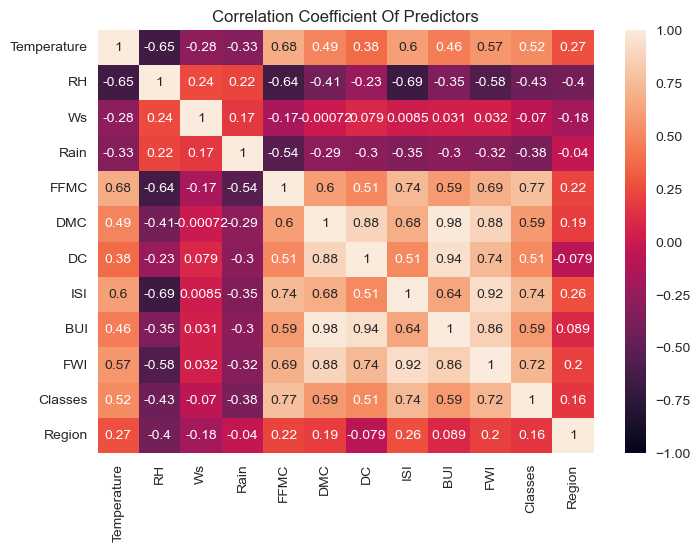

In [98]:
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
# generate heatmap
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

<Axes: >

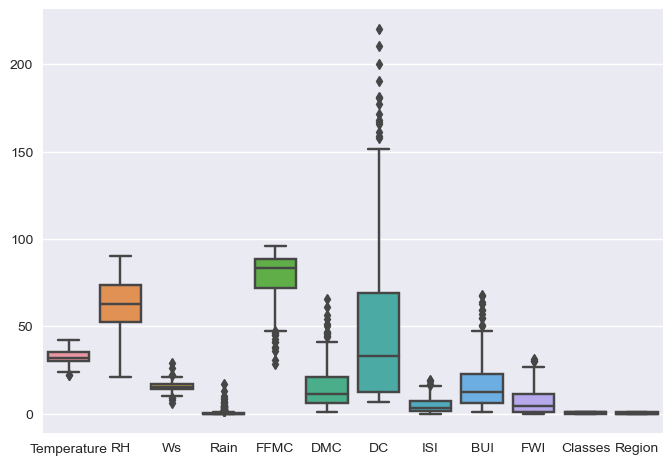

In [108]:
sns.boxplot(df1)

In [124]:
np.arange(4)

array([0, 1, 2, 3])

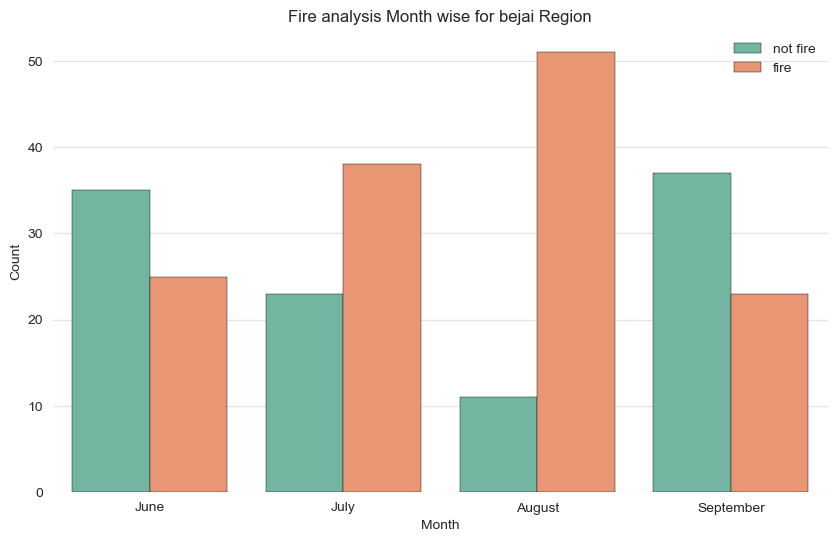

In [123]:
# Month Wise Fire analysis
dftemp = df.loc[df["Region"]==0]
plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes", data=df, ec = "black", palette="Set2")
plt.title("Fire analysis Month wise for bejai Region")
plt.ylabel("Count")
plt.xlabel("Month")
plt.legend(loc="upper right")
plt.xticks(np.arange(4), ["June", "July", "August", "September"])
plt.grid(alpha=0.5, axis="y")
plt.show()


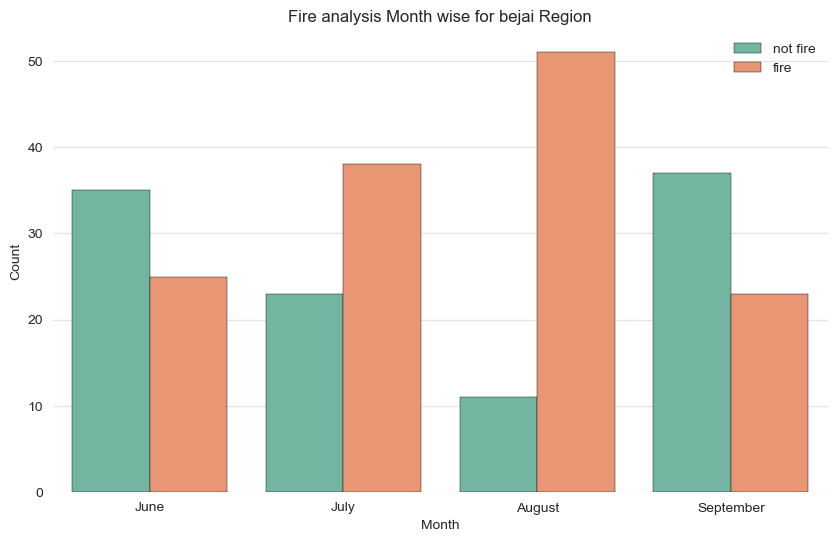

In [125]:
# Month Wise Fire analysis
dftemp = df.loc[df["Region"]==1]
plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes", data=df, ec = "black", palette="Set2")
plt.title("Fire analysis Month wise for bejai Region")
plt.ylabel("Count")
plt.xlabel("Month")
plt.legend(loc="upper right")
plt.xticks(np.arange(4), ["June", "July", "August", "September"])
plt.grid(alpha=0.5, axis="y")
plt.show()

In [126]:
df.loc[df["Region"]==1]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [127]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

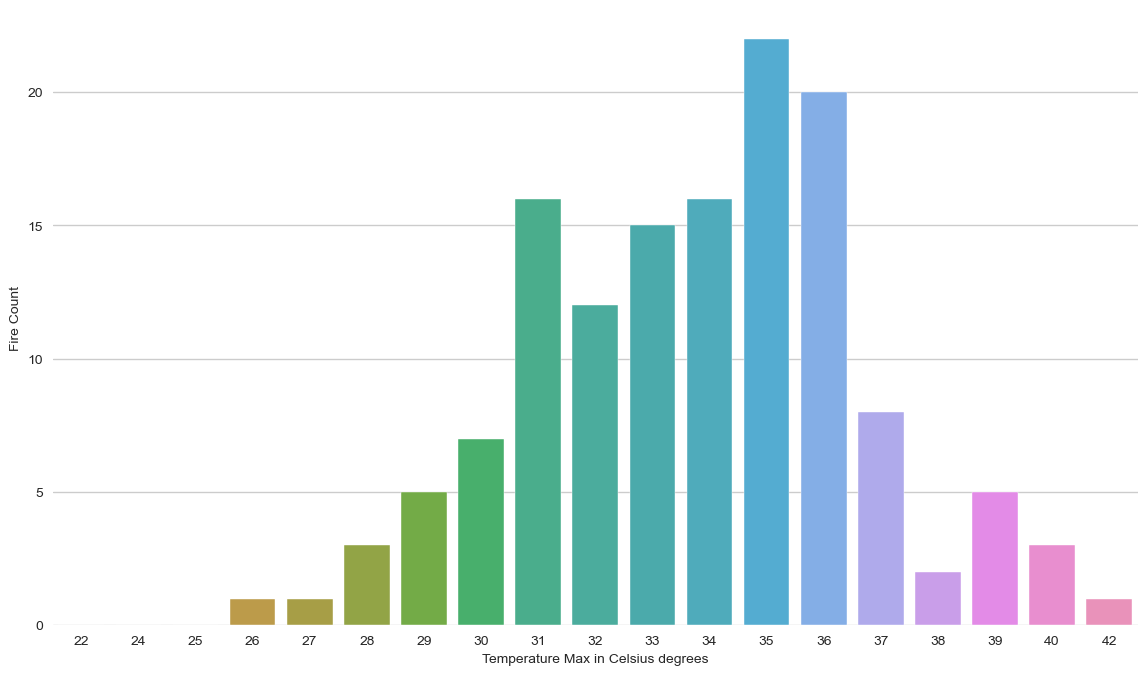

In [128]:
barchart('Temperature','Temperature Max in Celsius degrees')

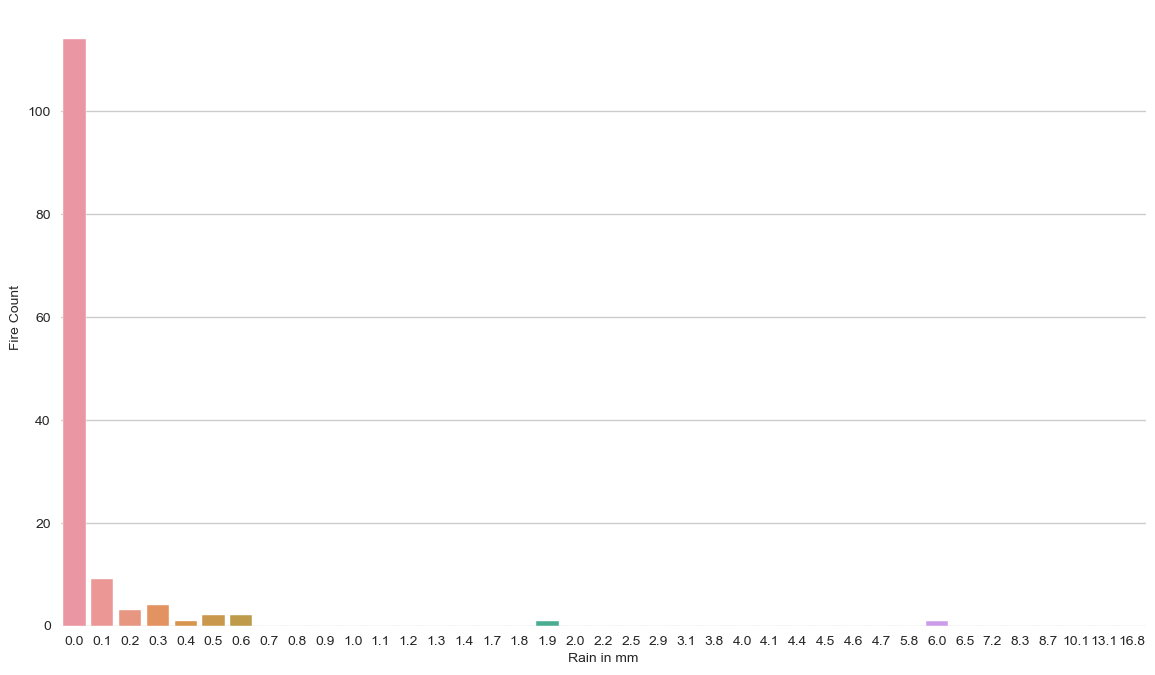

In [129]:
barchart('Rain', 'Rain in mm')

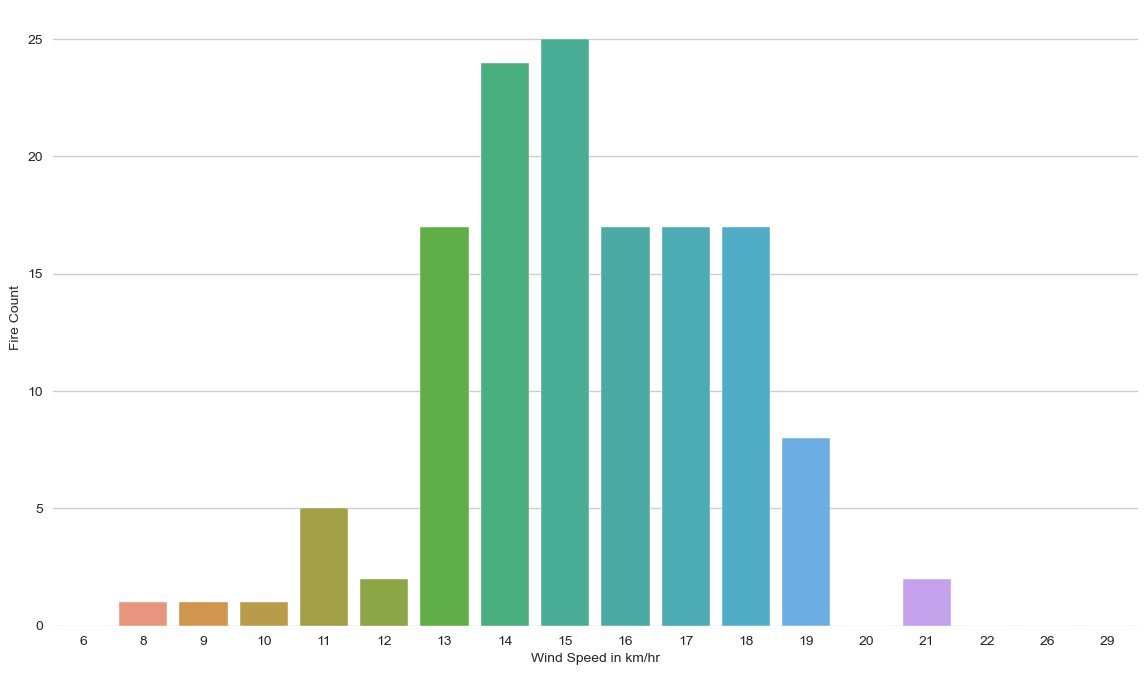

In [130]:
barchart('Ws', 'Wind Speed in km/hr')

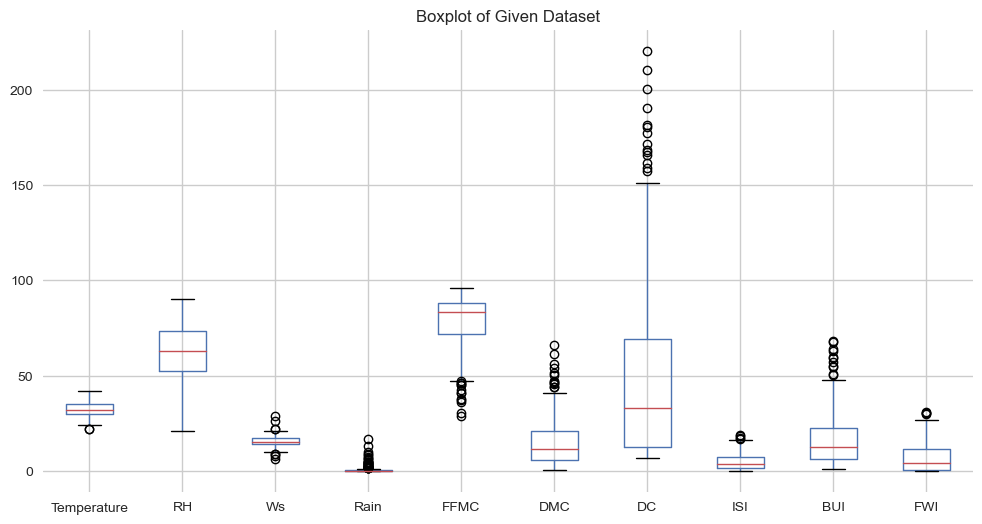

In [131]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

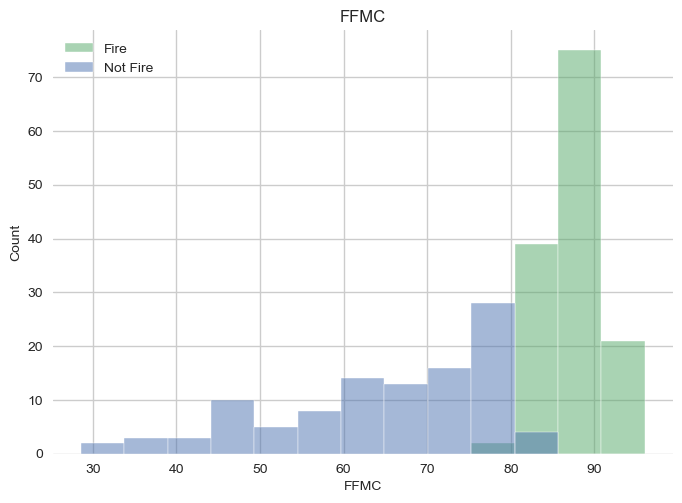

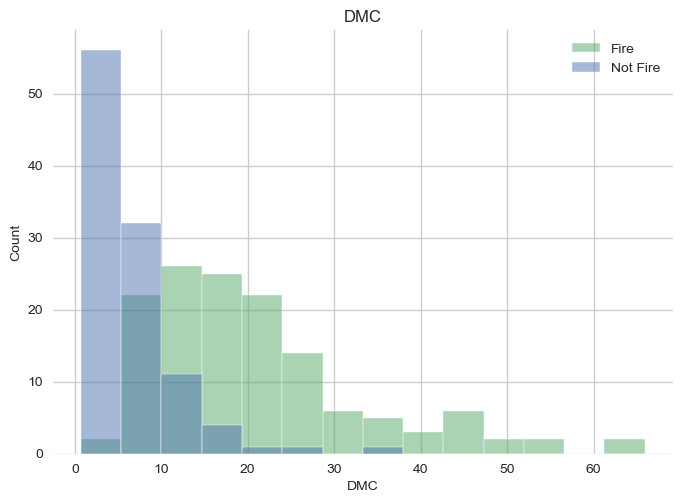

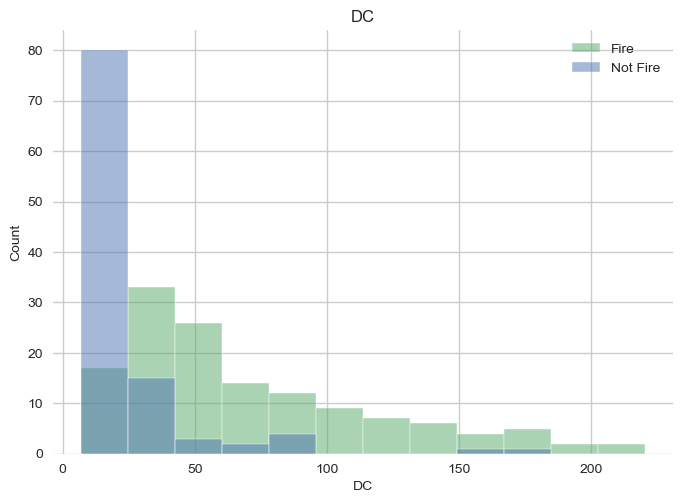

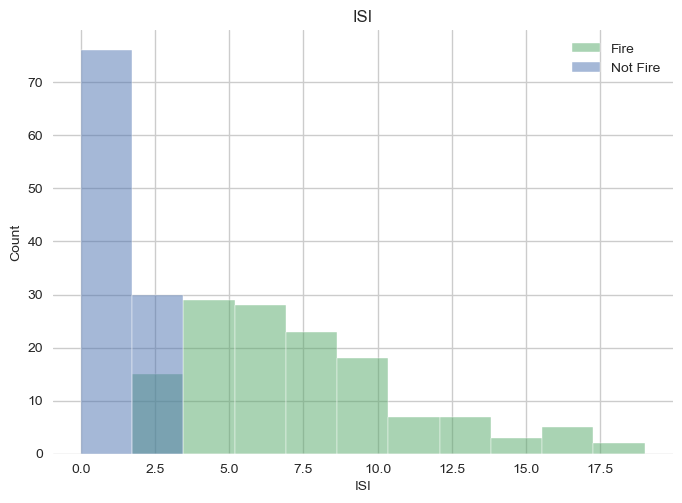

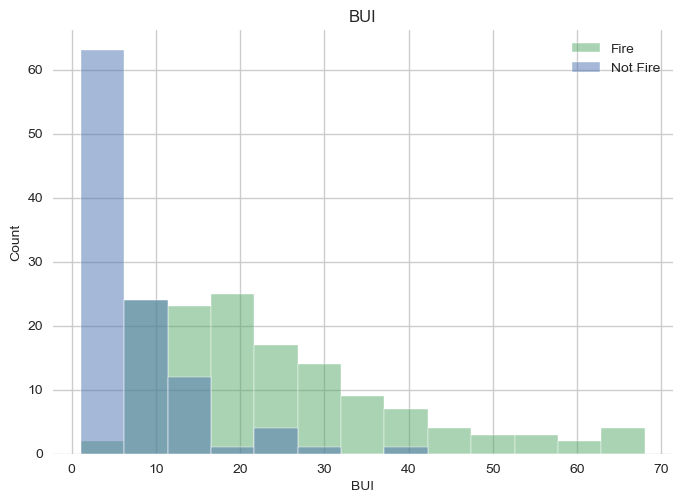

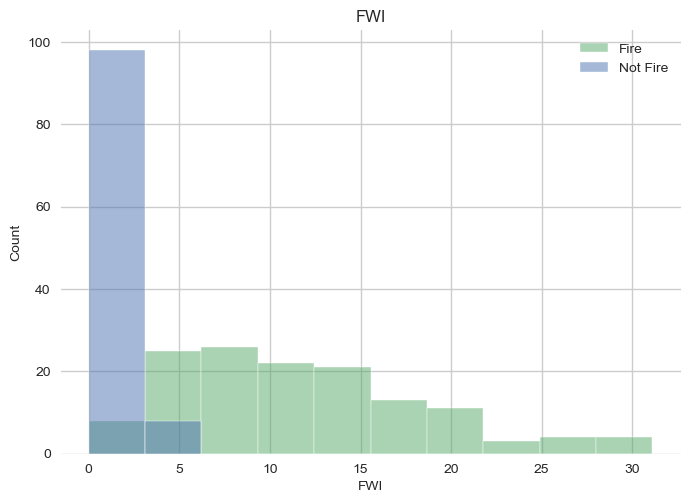

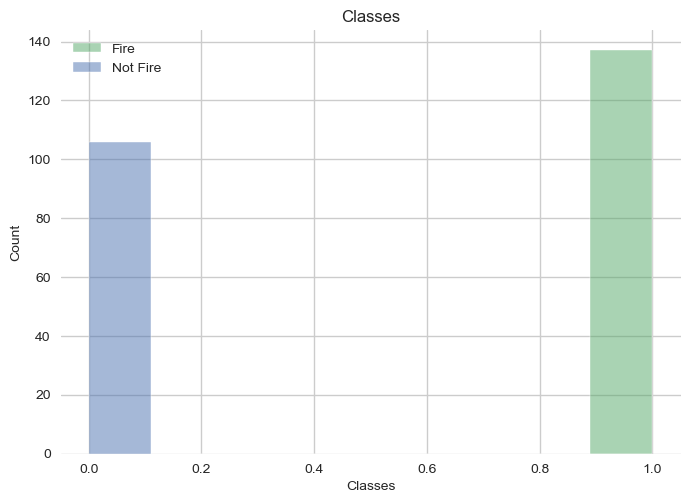

In [132]:
dftemp = dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

### REPORT 
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report 
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*, 
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*, 
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*, 
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*, 
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*, 
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.